In [1]:
import time
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

In [2]:
data_t5_small = {
  "sentence": "summarize: The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. We will be the comeback kids, all of us, he said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, but the president said some states may be able to return to normalcy earlier than that.",
    "model_name": "t5-small"
  }
data_bert = {
    "sentence": "I am not unhappy about the service you provided.",
    "labels": "happy,unhappy,neutral"
  }
data_t5_base = {
  "sentence": "summarize: The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. We will be the comeback kids, all of us, he said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, but the president said some states may be able to return to normalcy earlier than that.",
    "model_name": "t5-base"
  }

In [3]:
def latency_test(num_tests, url, data):
    tot_pred_time = timedelta(0)
    execution_time = []
    for i in range(num_tests):
        print('Epoch: ', i)
        
        time_start = datetime.now()
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(url, headers=headers, json=data)
        print(response.text)
        
        time_end = datetime.now()
        time_diff = time_end - time_start
        print("the time for making the API call is ", time_diff)
        tot_pred_time += time_diff
        execution_time.append(time_diff)

    print("the average time for making an API call is ", tot_pred_time/num_tests)
    print("the minimum time for making an API call is ", min(execution_time)) 
    print("the maximum time for making an API call is ", max(execution_time)) 
    return execution_time

In [4]:
import time
import os                                                                       
import threading
import subprocess
import json
import requests
import concurrent.futures

def num_of_requests_processed_within_a_period(secs,url, data):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(url, 
                                 headers=headers, 
                                 json=data)
        print(response.text)
        num += 1
    return num



        
        
def throughput_test(num_secs, ls_num_threads, url, data):
    tot_num_requests_processed = []
    print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

    for num_threads in ls_num_threads:
        with concurrent.futures.ThreadPoolExecutor() as executor:
            futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs, url, data) for param in [num_secs]*num_threads]
            results = [f.result() for f in futures]
            tot_req = sum(results)
            tot_num_requests_processed.append(tot_req)
            print('num_threads is: {};'.format(str(num_threads)), 
                  'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                          str(tot_req)))
    return tot_num_requests_processed

# Cloud Run

## t5

In [136]:
cr_t5 = 'https://zeroshot-t5-apnir7ajvq-nw.a.run.app/run-zerohot-t5'
cr_bert = 'https://zeroshot-cr-apnir7ajvq-nw.a.run.app/run-zerohot'

### t5-samll

In [137]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}
start_time = datetime.now()

response = requests.post(cr_t5, 
                         headers=headers, 
                         json=data_t5_small)


end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
tot time is  33.248448


In [138]:
execute_time_cr_t5_small = latency_test(10, cr_t5, data_t5_small)

Epoch:  0
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:15.669830
Epoch:  1
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:16.059759
Epoch:  2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:16.364089
Epoch:  3
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:15.593474
Epoch:  4
{ output:<pad> new guidelines to reopen the country will be announ

In [ ]:
df_request_time = pd.DataFrame ([i.total_seconds() for i in execute_time_cr_t5_small],columns=['cr_t5_small_4gb'])

In [139]:
df_request_time['cr_t5_small_4gb'] = [i.total_seconds() for i in execute_time_cr_t5_small]

### t5-base

In [140]:
start_time = datetime.now()
response = requests.post(cr_t5, 
                         headers=headers, 
                         json=data_t5_base)
end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
tot time is  37.639196


In [141]:
execute_time_cr_t5_base = latency_test(10, cr_t5, data_t5_base)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:29.013186
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:28.945437
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:28.539600
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:28.717043
Epoch:  4
{ output:<pad> the US has over 637

In [142]:
df_request_time['cr_t5_base_4gb'] = [i.total_seconds() for i in execute_time_cr_t5_base]

In [143]:
df_request_time

,cr_t5_small_4gb,cr_t5_base_4gb,cf_t5_small_filesys_8gb,cf_t5_small_from_download_4gb,cf_t5_base_filesys_8gb,cf_t5_base_from_download_4gb,gae_flex_t5_base_4gb,gae_flex_t5_small_4gb,cloud_run,cloud_functions,app_engine
0,15.669830,29.013186,18.073970,20.180597,27.433452,65.331110,21.329328,12.172956,CloudRun,CloudFunctions,AppEngine
1,16.059759,28.945437,42.211139,39.356077,30.656966,30.478591,40.336667,12.489288,CloudRun,CloudFunctions,AppEngine
2,16.364089,28.539600,16.412710,19.519319,26.628544,28.602381,27.735539,9.972992,CloudRun,CloudFunctions,AppEngine
3,15.593474,28.717043,12.072845,20.202842,27.124138,28.626620,22.646108,10.031644,CloudRun,CloudFunctions,AppEngine
4,15.469646,28.530679,11.773425,19.890247,26.981042,30.479580,20.657465,9.830339,CloudRun,CloudFunctions,AppEngine
5,15.912211,28.305627,11.848316,20.825964,26.670074,28.968232,23.624194,13.849469,CloudRun,CloudFunctions,AppEngine
6,16.102264,27.926954,11.876637,20.370390,27.827504,29.331415,22.579211,13.262517,CloudRun,CloudFunctions,AppEngine
7,15.935590,27.846632,11.714444,19.889267,27.105370,28.281231,36.869174,10.317775,CloudRun,CloudFunctions,AppEngine
8,15.856319,27.732595,11.992339,19.559473,26.348581,28.477600,27.353508,13.421326,CloudRun,CloudFunctions,AppEngine
9,16.234818,27.664916,11.456419,20.124807,30.096939,28.749408,21.181442,10.130974,CloudRun,CloudFunctions,AppEngine


## SentBert

In [56]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}
start_time = datetime.now()

response = requests.post(cr_bert, 
                         headers=headers, 
                         json=data_bert)


end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

tot time is  14.087937


In [58]:
execute_time_cr_sentbert = latency_test(10, cr_bert, data_bert)

Epoch:  0
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:07.107696
Epoch:  1
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:09.980018
Epoch:  2
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:06.914126
Epoch:  3
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:06.512308
Epoch:  4
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:06.177183
Epoch:  5
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:06.185821
Epoch:  6
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:06.494635
Epoch:

In [91]:
df_request_time['cr_sentbert'] = execute_time_cr_sentbert

# Cloud Functions

## t5

4 GB memory

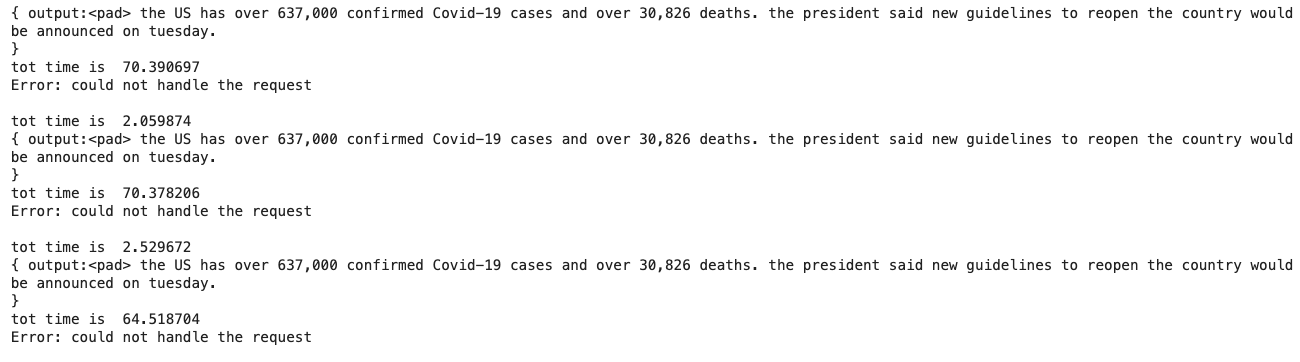

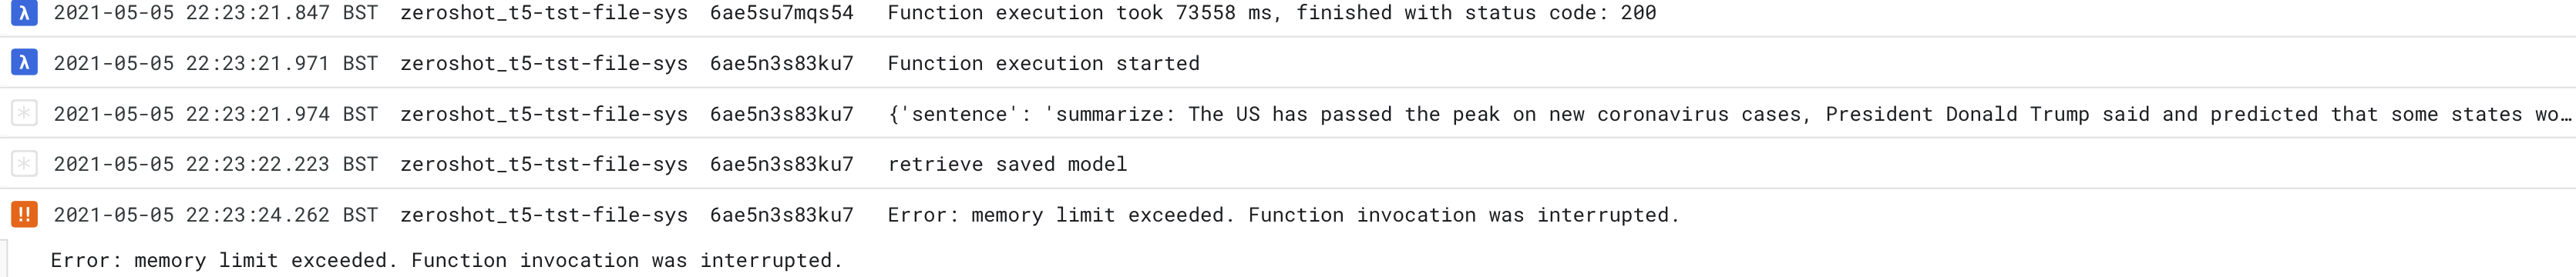

In [26]:
cf_t5 = 'https://europe-west2-gft-bike-insurance.cloudfunctions.net/zeroshot_t5'
cf_t5_filesys = 'https://europe-west2-gft-bike-insurance.cloudfunctions.net/zeroshot_t5-tst-file-sys-8gb'
cf_t5_8gb = 'https://europe-west2-gft-bike-insurance.cloudfunctions.net/zeroshot_t5-8gb'

### t5-small

In [80]:
import subprocess
import json
import requests
start_time = datetime.now()
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}


response = requests.post(cf_t5_8gb, 
                         headers=headers, 
                         json=data_t5_small)

end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
tot time is  53.412366


In [50]:
execute_time_cf_t5_small_8gb = latency_test(10, cf_t5_8gb, data_t5_small)

Epoch:  0
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for making the API call is  0:00:21.576102
Epoch:  1
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for making the API call is  0:00:17.215956
Epoch:  2
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for making the API call is  0:00:16.763393
Epoch:  3
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for making the API call is  0:00:16.613407
Epoch:  4
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for maki

In [51]:
df_request_time['cf_t5_small_8gb'] = [i.total_seconds() for i in execute_time_cf_t5_small_8gb]

In [81]:
import subprocess
import json
import requests
start_time = datetime.now()
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}


response = requests.post(cf_t5_filesys, 
                         headers=headers, 
                         json=data_t5_small)

end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
tot time is  42.894108


In [53]:
execute_time_cf_t5_small = latency_test(10, cf_t5_filesys, data_t5_small)

Epoch:  0
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:16.973565
Epoch:  1
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:18.243762
Epoch:  2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:17.957771
Epoch:  3
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:16.877817
Epoch:  4
{ output:<pad> new guidelines to reopen the country will be announ

In [54]:
df_request_time['cf_t5_small_filesys_8gb'] = [i.total_seconds() for i in execute_time_cf_t5_small]

In [82]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}

response = requests.post(cf_t5, 
                         headers=headers, 
                         json=data_t5_small)


print(response.text)

{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}


In [56]:
execute_time_cf_t5_small_from_download = latency_test(10, cf_t5, data_t5_small)

Epoch:  0
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for making the API call is  0:00:22.687975
Epoch:  1
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for making the API call is  0:00:16.638358
Epoch:  2
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for making the API call is  0:00:16.837266
Epoch:  3
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for making the API call is  0:00:16.999512
Epoch:  4
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
the time for maki

In [57]:
df_request_time['cf_t5_small_from_download_4gb'] = [i.total_seconds() for i in execute_time_cf_t5_small_from_download]

### t5-base

In [58]:
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}
start_time = datetime.now()
response = requests.post(cf_t5_8gb, 
                         headers=headers, 
                         json=data_t5_base)

end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
tot time is  72.772498


In [59]:
execute_time_cf_t5_base_8gb = latency_test(10, cf_t5_8gb, data_t5_base)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
the time for making the API call is  0:01:11.726159
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
the time for making the API call is  0:00:28.290987
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
the time for making the API call is  0:00:27.755310
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
the time for making the API call is  0:00:28.712540
Epoch:  4
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some state

In [60]:
df_request_time['cf_t5_base_8gb'] = [i.total_seconds() for i in execute_time_cf_t5_base_8gb]
df_request_time

,cr_t5_small_4gb,cr_t5_base_4gb,cf_t5_small_filesys_8gb,cf_t5_small_from_download_4gb,cf_t5_base_filesys_8gb,cf_t5_base_from_download_4gb,gae_flex_t5_base_4gb,gae_flex_t5_small_4gb,cf_t5_small_8gb,cf_t5_base_8gb
0,15.669830,29.013186,16.973565,22.687975,57.086809,7.815792,64.018677,14.743273,21.576102,71.726159
1,16.059759,28.945437,18.243762,16.638358,30.448906,63.903249,28.733756,15.069805,17.215956,28.290987
2,16.364089,28.539600,17.957771,16.837266,29.898156,75.975940,72.794661,13.348741,16.763393,27.755310
3,15.593474,28.717043,16.877817,16.999512,32.409800,9.176198,26.815371,13.562284,16.613407,28.712540
4,15.469646,28.530679,16.986148,16.567838,28.614131,70.134413,27.235581,15.283521,16.364685,27.765176
5,15.912211,28.305627,16.793565,16.763213,28.301420,7.849719,31.804141,14.716477,16.441183,27.731687
6,16.102264,27.926954,12.908783,17.194757,31.079068,65.718909,33.529670,13.970756,16.587875,27.734721
7,15.935590,27.846632,12.667176,17.303575,30.709366,8.562893,26.243305,13.182573,17.434339,28.535216
8,15.856319,27.732595,13.001400,17.924860,30.156619,109.604977,32.042417,15.673346,16.202891,27.877223
9,16.234818,27.664916,13.038280,16.981582,31.349898,8.731203,27.142317,13.787503,16.694013,28.763819


In [61]:
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}
start_time = datetime.now()
response = requests.post(cf_t5_filesys, 
                         headers=headers, 
                         json=data_t5_base)

end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
tot time is  75.255353


In [62]:
execute_time_cf_t5_base = latency_test(10, cf_t5_filesys, data_t5_base)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:31.632552
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:30.234588
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:30.733530
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:30.736410
Epoch:  4
{ output:<pad> the US has over 637

In [63]:
df_request_time['cf_t5_base_filesys_8gb'] = [i.total_seconds() for i in execute_time_cf_t5_base]

In [64]:
start_time = datetime.now()
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}
response = requests.post(cf_t5, 
                         headers=headers, 
                         json=data_t5_base)

end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
tot time is  82.91814


In [68]:
execute_time_cf_t5_base_from_download = latency_test(10, cf_t5, data_t5_base)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
the time for making the API call is  0:01:38.798706
Epoch:  1
Error: could not handle the request

the time for making the API call is  0:00:07.503984
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
the time for making the API call is  0:01:03.878090
Epoch:  3
Error: could not handle the request

the time for making the API call is  0:00:08.534458
Epoch:  4
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president predicts that some states will reopen this month.
}
the time for making the API call is  0:01:02.173720
Epoch:  5
Error: could not handle the request

the time for making the API call is  0:00:07.780752
Epoch:  6
{ output:<pad> the US has over 637,000 confir

In [69]:
df_request_time['cf_t5_base_from_download_4gb'] = [i.total_seconds() for i in execute_time_cf_t5_base_from_download]

In [75]:
a_list = []
for item in df_request_time['cf_t5_base_from_download_4gb']:
    if item > 10:
        a_list.append(item)
    else:
        a_list.append(np.nan)
a_list

[98.798706, nan, 63.87809, nan, 62.17372, nan, 66.140373, nan, 93.164659, nan]

In [76]:
df_request_time['cf_t5_base_from_download_4gb'] = a_list

In [78]:
df_request_time.to_csv('latency_test.csv',index=False)
df_request_time

,cr_t5_small_4gb,cr_t5_base_4gb,cf_t5_small_filesys_8gb,cf_t5_small_from_download_4gb,cf_t5_base_filesys_8gb,cf_t5_base_from_download_4gb,gae_flex_t5_base_4gb,gae_flex_t5_small_4gb,cf_t5_small_8gb,cf_t5_base_8gb
0,15.669830,29.013186,16.973565,22.687975,31.632552,98.798706,64.018677,14.743273,21.576102,71.726159
1,16.059759,28.945437,18.243762,16.638358,30.234588,NaN,28.733756,15.069805,17.215956,28.290987
2,16.364089,28.539600,17.957771,16.837266,30.733530,63.878090,72.794661,13.348741,16.763393,27.755310
3,15.593474,28.717043,16.877817,16.999512,30.736410,NaN,26.815371,13.562284,16.613407,28.712540
4,15.469646,28.530679,16.986148,16.567838,31.436952,62.173720,27.235581,15.283521,16.364685,27.765176
5,15.912211,28.305627,16.793565,16.763213,32.762006,NaN,31.804141,14.716477,16.441183,27.731687
6,16.102264,27.926954,12.908783,17.194757,33.255051,66.140373,33.529670,13.970756,16.587875,27.734721
7,15.935590,27.846632,12.667176,17.303575,109.009668,NaN,26.243305,13.182573,17.434339,28.535216
8,15.856319,27.732595,13.001400,17.924860,32.885068,93.164659,32.042417,15.673346,16.202891,27.877223
9,16.234818,27.664916,13.038280,16.981582,31.714196,NaN,27.142317,13.787503,16.694013,28.763819


### Multithreaded requests

In [83]:
df_throughput = pd.read_csv('throughput_tests.csv')
df_throughput

,num_threads,cf_4gb,cf_8gb_filesys,cr_4gb,cr_error,cf_4gb_error,cf_8gb_filesys_error,cf_4gb_success,cf_8gb_filesys_success,cr_4gb_success,gae_4gb,gae_4gb_success,cf_8gb,cf_8gb_error,cf_8gb_success
0,2,6,6,6,0,0,0,6,6,6,7,7,6,0,6
1,4,16,15,15,2,0,2,16,13,13,14,14,10,0,10
2,6,23,23,21,5,0,6,23,17,16,16,16,18,2,16
3,8,28,34,28,7,0,8,28,26,21,21,21,23,3,20
4,10,35,43,49,27,0,5,35,38,22,19,19,31,11,20
5,12,44,54,59,35,8,5,36,49,24,24,24,40,14,26
6,14,52,61,76,53,14,13,38,48,23,23,23,49,20,29
7,16,61,68,80,58,18,3,43,65,22,27,27,51,12,39
8,18,65,74,90,58,14,4,51,70,32,31,31,58,14,44
9,20,70,86,95,62,13,6,57,80,33,32,32,56,13,43


### on cf_t5

In [84]:
num_secs = 60
ls_num_threads = [2,4,6,8,10,12,14,16,18,20]
tot_num_requests_processed_cf_t5 = throughput_test(num_secs, ls_num_threads, cf_t5, data_t5_small)

The throughput is tested within a duration of 60s
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
num_threads is: 2; tot number of requests processed in 60s are 5
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> 

In [224]:
# df_throughput = pd.DataFrame (ls_num_threads,columns=['num_threads'])

In [85]:
df_throughput['cf_4gb'] = tot_num_requests_processed_cf_t5

### on cf_t5_8gb

In [86]:
num_secs = 60
ls_num_threads = [2,4,6,8,10,12,14,16,18,20]
tot_num_requests_processed_cf_t5_8gb = throughput_test(num_secs, ls_num_threads, cf_t5_8gb, data_t5_small)
df_throughput['cf_8gb'] = tot_num_requests_processed_cf_t5_8gb

The throughput is tested within a duration of 60s
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
num_threads is: 2; tot number of requests processed in 60s are 4
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> the president predicts some states will reopen this month. the country has over 637,000 confirmed cases and over 30,826 deaths.
}
{ output:<pad> 

### on cf_t5_filesys

In [87]:
tot_num_requests_processed_cf_t5_filesys = throughput_test(num_secs, ls_num_threads, cf_t5_filesys, data_t5_small)

The throughput is tested within a duration of 60s
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said som

In [88]:
df_throughput['cf_8gb_filesys'] = tot_num_requests_processed_cf_t5_filesys

In [89]:
df_throughput.to_csv('throughput_tests.csv', index = False)

In [90]:
print("Success!")

Success!


In [228]:
tot_num_requests_processed_cr_4gb = throughput_test(num_secs, ls_num_threads, cr_t5, data_t5_small)
df_throughput['cr_4gb'] = tot_num_requests_processed_cr_4gb

The throughput is tested within a duration of 60s
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said som

In [229]:
df_throughput

,num_threads,cf_4gb,cf_8gb_filesys,cr_4gb
0,2,6,6,6
1,4,16,15,15
2,6,23,23,21
3,8,28,34,28
4,10,35,43,49
5,12,44,54,59
6,14,52,61,76
7,16,61,68,80
8,18,65,74,90
9,20,70,86,95


In [68]:
df_throughput = pd.read_csv('throughput_tests.csv')
df_throughput

,num_threads,cf_4gb,cf_8gb_filesys,cr_4gb,cr_error,cf_4gb_error,cf_8gb_filesys_error,cf_4gb_success,cf_8gb_filesys_success,cr_4gb_success
0,2,6,6,6,0,0,0,6,6,6
1,4,16,15,15,2,0,2,16,13,13
2,6,23,23,21,5,0,6,23,17,16
3,8,28,34,28,7,0,8,28,26,21
4,10,35,43,49,27,0,5,35,38,22
5,12,44,54,59,35,8,5,36,49,24
6,14,52,61,76,53,14,13,38,48,23
7,16,61,68,80,58,18,3,43,65,22
8,18,65,74,90,58,14,4,51,70,32
9,20,70,86,95,62,13,6,57,80,33


In [70]:
num_secs = 60
ls_num_threads = [2,4,6,8,10,12,14,16,18,20]
tot_num_requests_processed_gae_4gb = throughput_test(num_secs, ls_num_threads, gae_t5_small, data_t5_small)
df_throughput['gae_4gb'] = tot_num_requests_processed_gae_4gb
df_throughput

The throughput is tested within a duration of 60s
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said som

,num_threads,cf_4gb,cf_8gb_filesys,cr_4gb,cr_error,cf_4gb_error,cf_8gb_filesys_error,cf_4gb_success,cf_8gb_filesys_success,cr_4gb_success,gae_4gb
0,2,6,6,6,0,0,0,6,6,6,7
1,4,16,15,15,2,0,2,16,13,13,14
2,6,23,23,21,5,0,6,23,17,16,16
3,8,28,34,28,7,0,8,28,26,21,21
4,10,35,43,49,27,0,5,35,38,22,19
5,12,44,54,59,35,8,5,36,49,24,24
6,14,52,61,76,53,14,13,38,48,23,23
7,16,61,68,80,58,18,3,43,65,22,27
8,18,65,74,90,58,14,4,51,70,32,31
9,20,70,86,95,62,13,6,57,80,33,32


In [83]:
df_throughput['gae_4gb_success'] = df_throughput['gae_4gb']
df_throughput.to_csv('throughput_tests.csv',index=False)

In [84]:
df_throughput

,num_threads,cf_4gb,cf_8gb_filesys,cr_4gb,cr_error,cf_4gb_error,cf_8gb_filesys_error,cf_4gb_success,cf_8gb_filesys_success,cr_4gb_success,gae_4gb,gae_4gb_success
0,2,6,6,6,0,0,0,6,6,6,7,7
1,4,16,15,15,2,0,2,16,13,13,14,14
2,6,23,23,21,5,0,6,23,17,16,16,16
3,8,28,34,28,7,0,8,28,26,21,21,21
4,10,35,43,49,27,0,5,35,38,22,19,19
5,12,44,54,59,35,8,5,36,49,24,24,24
6,14,52,61,76,53,14,13,38,48,23,23,23
7,16,61,68,80,58,18,3,43,65,22,27,27
8,18,65,74,90,58,14,4,51,70,32,31,31
9,20,70,86,95,62,13,6,57,80,33,32,32


In [85]:
df_throughput.columns

Index(['num_threads', 'cf_4gb', 'cf_8gb_filesys', 'cr_4gb', 'cr_error',
       'cf_4gb_error', 'cf_8gb_filesys_error', 'cf_4gb_success',
       'cf_8gb_filesys_success', 'cr_4gb_success', 'gae_4gb',
       'gae_4gb_success'],
      dtype='object')

In [88]:
df_throughput[['num_threads', 'cf_4gb_success', 'cf_8gb_filesys_success', 'cr_4gb_success', 'gae_4gb_success']]

,num_threads,cf_4gb_success,cf_8gb_filesys_success,cr_4gb_success,gae_4gb_success
0,2,6,6,6,7
1,4,16,13,13,14
2,6,23,17,16,16
3,8,28,26,21,21
4,10,35,38,22,19
5,12,36,49,24,24
6,14,38,48,23,23
7,16,43,65,22,27
8,18,51,70,32,31
9,20,57,80,33,32


# bert

writing to temp directory with 1GB has memory exceed issue!

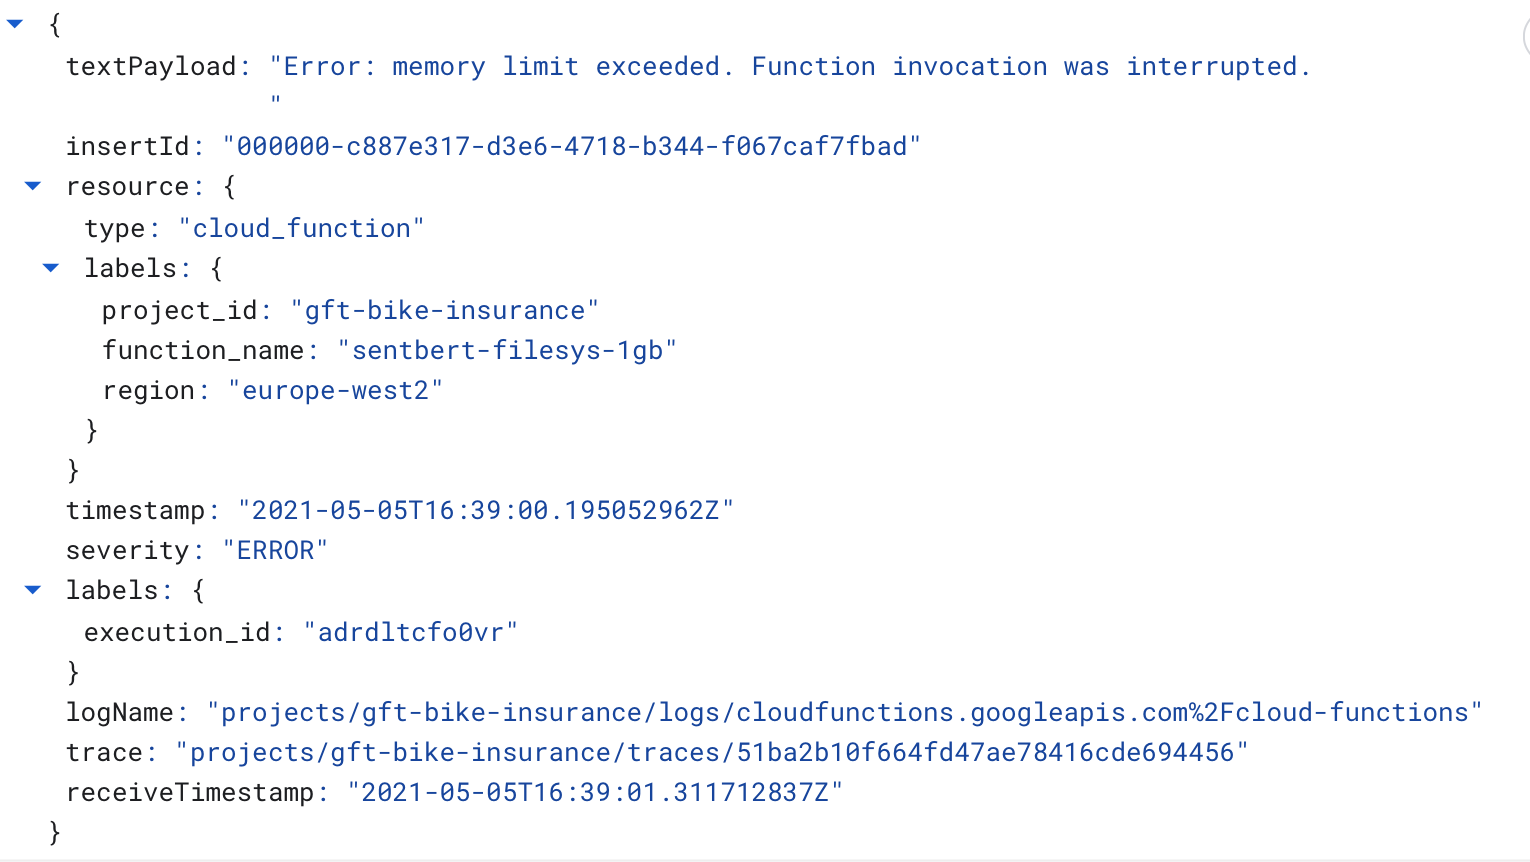

writing to temp directory with 2GB has memory exceed issue

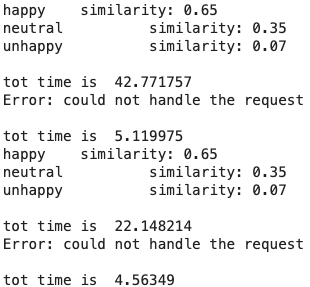

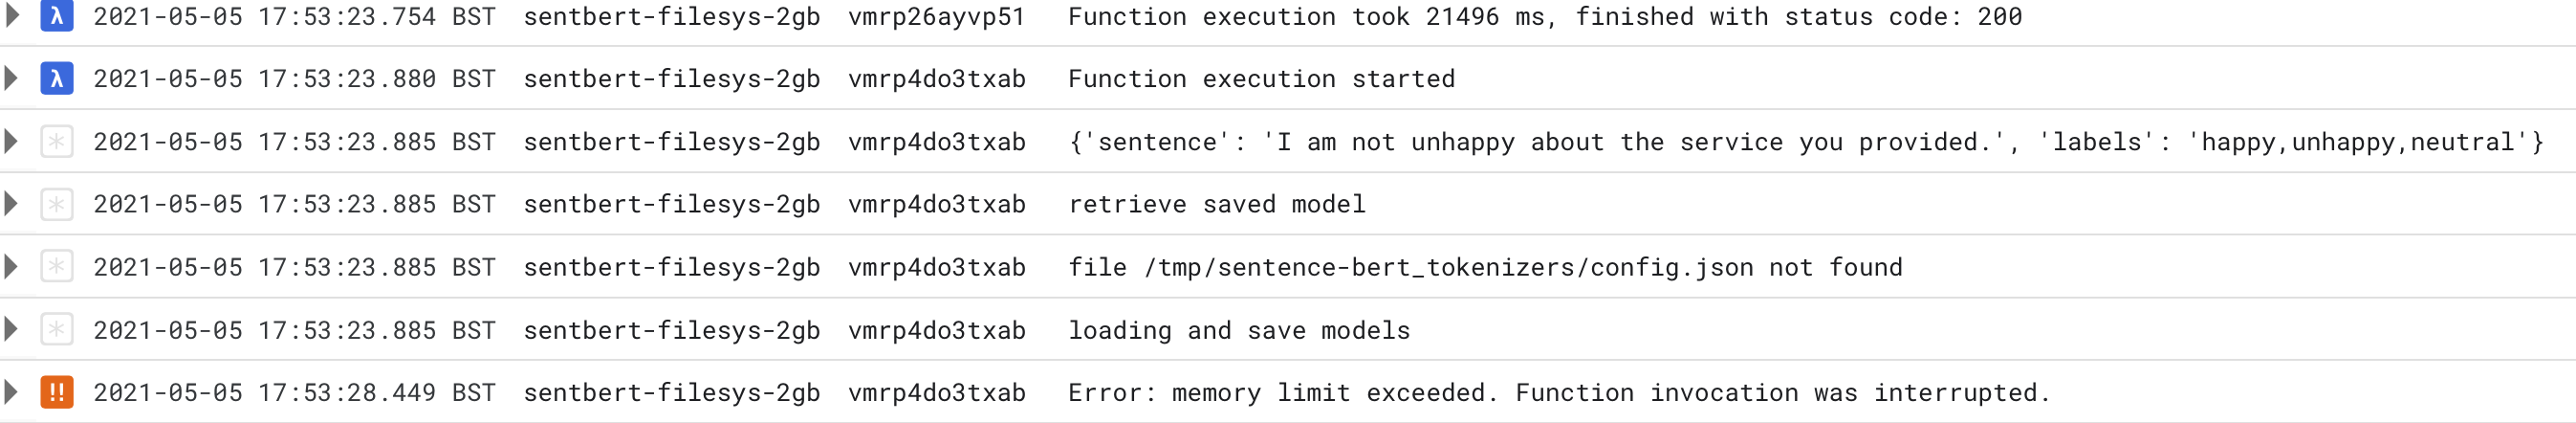

In [5]:
cf_sentbert='https://europe-west2-gft-bike-insurance.cloudfunctions.net/sentbert-filesys-4gb'

In [77]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}
start_time = datetime.now()

response = requests.post(cf_sentbert, 
                         headers=headers, 
                         json=data_bert)

end_time = datetime.now()
time_diff = end_time - start_time
print(response.text)
print('tot time is ', time_diff.total_seconds())

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

tot time is  43.444883


In [78]:
execute_time_cf_sentbert_filesys = latency_test(10, cf_sentbert, data_bert)

Epoch:  0
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:08.229696
Epoch:  1
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:07.617541
Epoch:  2
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:07.820398
Epoch:  3
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:10.839026
Epoch:  4
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:07.056362
Epoch:  5
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:07.072526
Epoch:  6
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:07.119408
Epoch:

In [96]:
df_request_time['cf_sentbert_filesys'] = execute_time_cf_sentbert_filesys

Another approach is the bundle the models files together with the function deployment using gcloud cli, however due to the Max deployment size of 100MB (compressed) for sources. 500MB (uncompressed) for sources plus modules. (https://cloud.google.com/functions/quotas#resource_limits). That is not possible for all the tested models (t5-small, t5-base and sentBert) for the smallest model is bigger than 200MB.


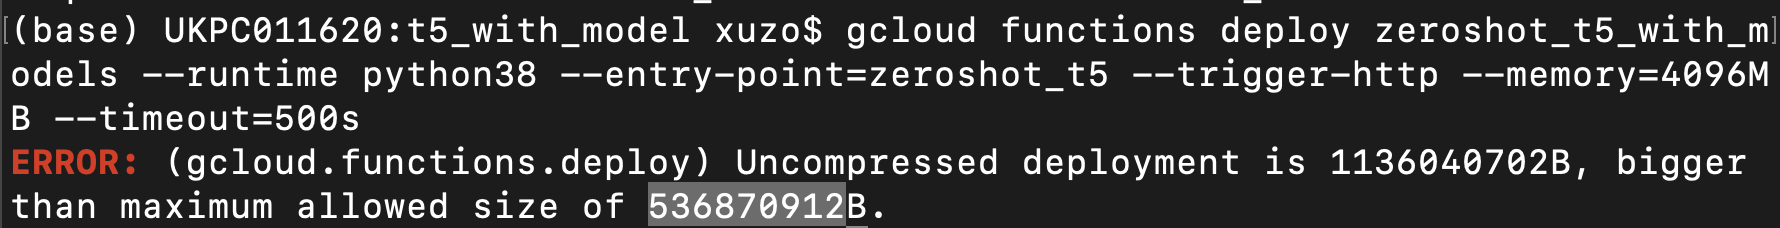


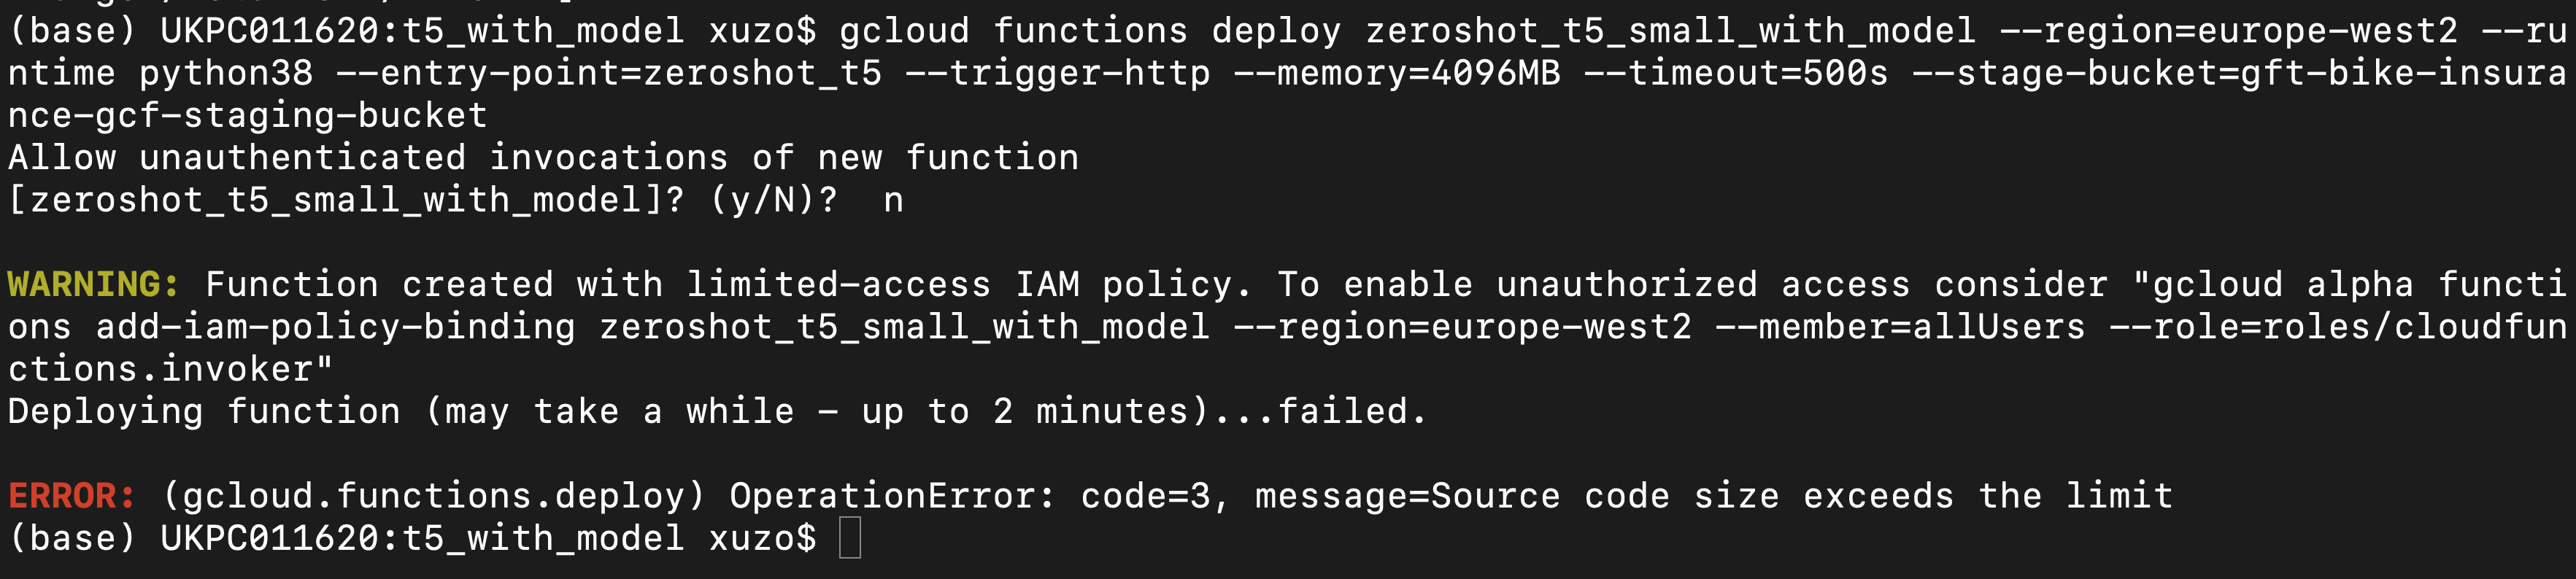

In [97]:
df_request_time

,cr_t5_small,cr_t5_base,cr_sentbert,cf_t5_small,cf_t5_small_from_download,cf_t5_base,cf_t5_base_from_download,cf_sentbert_filesys
0,0 days 00:00:12.470724,0 days 00:00:22.613547,0 days 00:00:07.107696,0 days 00:00:16.181326,0 days 00:00:21.425541,0 days 00:00:54.481227,0 days 00:01:13.742610,0 days 00:00:08.229696
1,0 days 00:00:12.268000,0 days 00:00:24.236935,0 days 00:00:09.980018,0 days 00:00:39.902782,0 days 00:00:33.564215,0 days 00:00:32.795498,0 days 00:00:29.529470,0 days 00:00:07.617541
2,0 days 00:00:16.991655,0 days 00:00:21.688812,0 days 00:00:06.914126,0 days 00:00:16.706089,0 days 00:00:18.826751,0 days 00:00:31.307628,0 days 00:00:26.115620,0 days 00:00:07.820398
3,0 days 00:00:12.332033,0 days 00:00:21.690805,0 days 00:00:06.512308,0 days 00:00:16.261405,0 days 00:00:15.130262,0 days 00:00:34.958675,0 days 00:00:25.592551,0 days 00:00:10.839026
4,0 days 00:00:12.337407,0 days 00:00:28.736599,0 days 00:00:06.177183,0 days 00:00:16.144134,0 days 00:00:14.948971,0 days 00:00:29.592614,0 days 00:00:26.075202,0 days 00:00:07.056362
5,0 days 00:00:12.449577,0 days 00:00:22.129792,0 days 00:00:06.185821,0 days 00:00:16.032188,0 days 00:00:14.571087,0 days 00:00:30.297127,0 days 00:00:25.882165,0 days 00:00:07.072526
6,0 days 00:00:12.496299,0 days 00:00:21.731818,0 days 00:00:06.494635,0 days 00:00:16.722873,0 days 00:00:15.190920,0 days 00:00:29.501654,0 days 00:00:25.772678,0 days 00:00:07.119408
7,0 days 00:00:12.389347,0 days 00:00:28.739543,0 days 00:00:06.750811,0 days 00:00:16.775992,0 days 00:00:14.939070,0 days 00:00:29.811697,0 days 00:00:26.020065,0 days 00:00:07.580924
8,0 days 00:00:12.541783,0 days 00:00:30.690905,0 days 00:00:06.817110,0 days 00:00:16.398148,0 days 00:00:14.719025,0 days 00:00:30.337139,0 days 00:00:25.689540,0 days 00:00:07.391372
9,0 days 00:00:12.679379,0 days 00:00:30.558606,0 days 00:00:07.640146,0 days 00:00:16.313362,0 days 00:00:14.705638,0 days 00:00:29.573840,0 days 00:00:25.669623,0 days 00:00:07.604650


#### Multithreading test

In [79]:
tot_num_requests_processed_cf_sentbert_filesys = throughput_test(num_secs, ls_num_threads, cf_sentbert, data_bert)

The throughput is tested within a duration of 20s
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

num_threads is: 1; tot number of requests processed in 20s are 3
Error: could not handle the request

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

num_threads is: 2; tot number of requests processed in 20s are 3
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 s

# App Engine Flexible Environment

## t5

In [5]:
# gae_t5 = 'https://t5-flex-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
# gae_t5_local = 'http://localhost:8080/run-zerohot-t5'
gae_t5_base = 'https://t5-base-flex-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
gae_t5_small = 'https://t5-small-flex-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
gee_t5_standard = 'https://t5-standard-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'

### local testing

In [6]:
# import subprocess
# import json
# import requests
# output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
# access_token = "Bearer " + output[:-1]

# headers = {'Authorization': access_token}

# response = requests.post(gae_t5_local, 
#                          headers=headers, 
#                          json=data_t5_base)


# print(response.text)

In [7]:
# import subprocess
# import json
# import requests
# output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
# access_token = "Bearer " + output[:-1]

# headers = {'Authorization': access_token}

# response = requests.post(gae_t5_local, 
#                          headers=headers, 
#                          json=data_t5_small)


# print(response.text)

In [72]:
gae_t5_base

'https://t5-base-flex-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'

### t5-base

In [73]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}

response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)


print(response.text)

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}


In [74]:
execute_time_gae_flex = latency_test(10, gae_t5_base, data_t5_base)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:01:04.018677
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:28.733756
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:01:12.794661
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:26.815371
Epoch:  4
{ output:<pad> the US has over 637

In [75]:
df_request_time['gae_flex_t5_base_4gb'] = [i.total_seconds() for i in execute_time_gae_flex]

In [ ]:
gae_t5_base

### t5-small

In [69]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}

response = requests.post(gae_t5_small, 
                         headers=headers, 
                         json=data_t5_small)


print(response.text)

{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}


In [33]:
execute_time_gae_flex_t5_small =  latency_test(10, gae_t5_small, data_t5_small)

Epoch:  0
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:14.743273
Epoch:  1
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:15.069805
Epoch:  2
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:13.348741
Epoch:  3
{ output:<pad> new guidelines to reopen the country will be announced on Thursday. the president said some states may be able to return to normalcy earlier than that.
}
the time for making the API call is  0:00:13.562284
Epoch:  4
{ output:<pad> new guidelines to reopen the country will be announ

In [34]:
df_request_time['gae_flex_t5_small_4gb'] = [i.total_seconds() for i in execute_time_gae_flex_t5_small]

In [76]:
df_request_time

,cr_t5_small_4gb,cr_t5_base_4gb,cf_t5_small_filesys_8gb,cf_t5_small_from_download_4gb,cf_t5_base_filesys_8gb,cf_t5_base_from_download_4gb,gae_flex_t5_base_4gb,gae_flex_t5_small_4gb
0,15.669830,29.013186,17.333982,26.481070,30.228011,32.902032,64.018677,14.743273
1,16.059759,28.945437,37.276494,16.957320,34.831574,32.868340,28.733756,15.069805
2,16.364089,28.539600,13.448170,17.887883,30.608267,32.338835,72.794661,13.348741
3,15.593474,28.717043,12.701222,16.550302,30.313937,33.106790,26.815371,13.562284
4,15.469646,28.530679,13.467914,16.988248,30.117170,76.588102,27.235581,15.283521
5,15.912211,28.305627,13.701416,17.440813,31.326404,32.231392,31.804141,14.716477
6,16.102264,27.926954,13.319023,17.803095,30.432745,32.299740,33.529670,13.970756
7,15.935590,27.846632,13.605973,16.422720,30.280990,32.459426,26.243305,13.182573
8,15.856319,27.732595,13.118098,17.031111,30.858335,31.915427,32.042417,15.673346
9,16.234818,27.664916,13.185386,16.607850,30.400682,32.356328,27.142317,13.787503


In [77]:
df_request_time.describe()

,cr_t5_small_4gb,cr_t5_base_4gb,cf_t5_small_filesys_8gb,cf_t5_small_from_download_4gb,cf_t5_base_filesys_8gb,cf_t5_base_from_download_4gb,gae_flex_t5_base_4gb,gae_flex_t5_small_4gb
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,15.919800,28.322267,16.115768,18.017041,30.939812,36.906641,37.035990,14.333828
std,0.283913,0.502751,7.546668,3.016008,1.412986,13.947296,16.849508,0.873900
min,15.469646,27.664916,12.701222,16.422720,30.117170,31.915427,26.243305,13.182573
25%,15.716452,27.866712,13.218795,16.695217,30.289227,32.309514,27.165633,13.618589
50%,15.923900,28.418153,13.458042,17.009679,30.416714,32.407877,30.268949,14.343616
75%,16.091638,28.672682,13.677555,17.712525,30.795818,32.893609,33.157857,14.988172
max,16.364089,29.013186,37.276494,26.481070,34.831574,76.588102,72.794661,15.673346


In [78]:
df_request_time.to_csv('latency_test.csv',index=False)

### standard environment

In [37]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}

response = requests.post(gee_t5_standard, 
                         headers=headers, 
                         json=data_t5_base)


print(response.text)


<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>



In [40]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}

response = requests.post(gee_t5_standard, 
                         headers=headers, 
                         json=data_t5_small)


print(response.text)


<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>



For the largest instance of standard enviroment is 2GB, if we put the two models (t5-small t5-base) together, it will encounter the meomory excession error as shown below

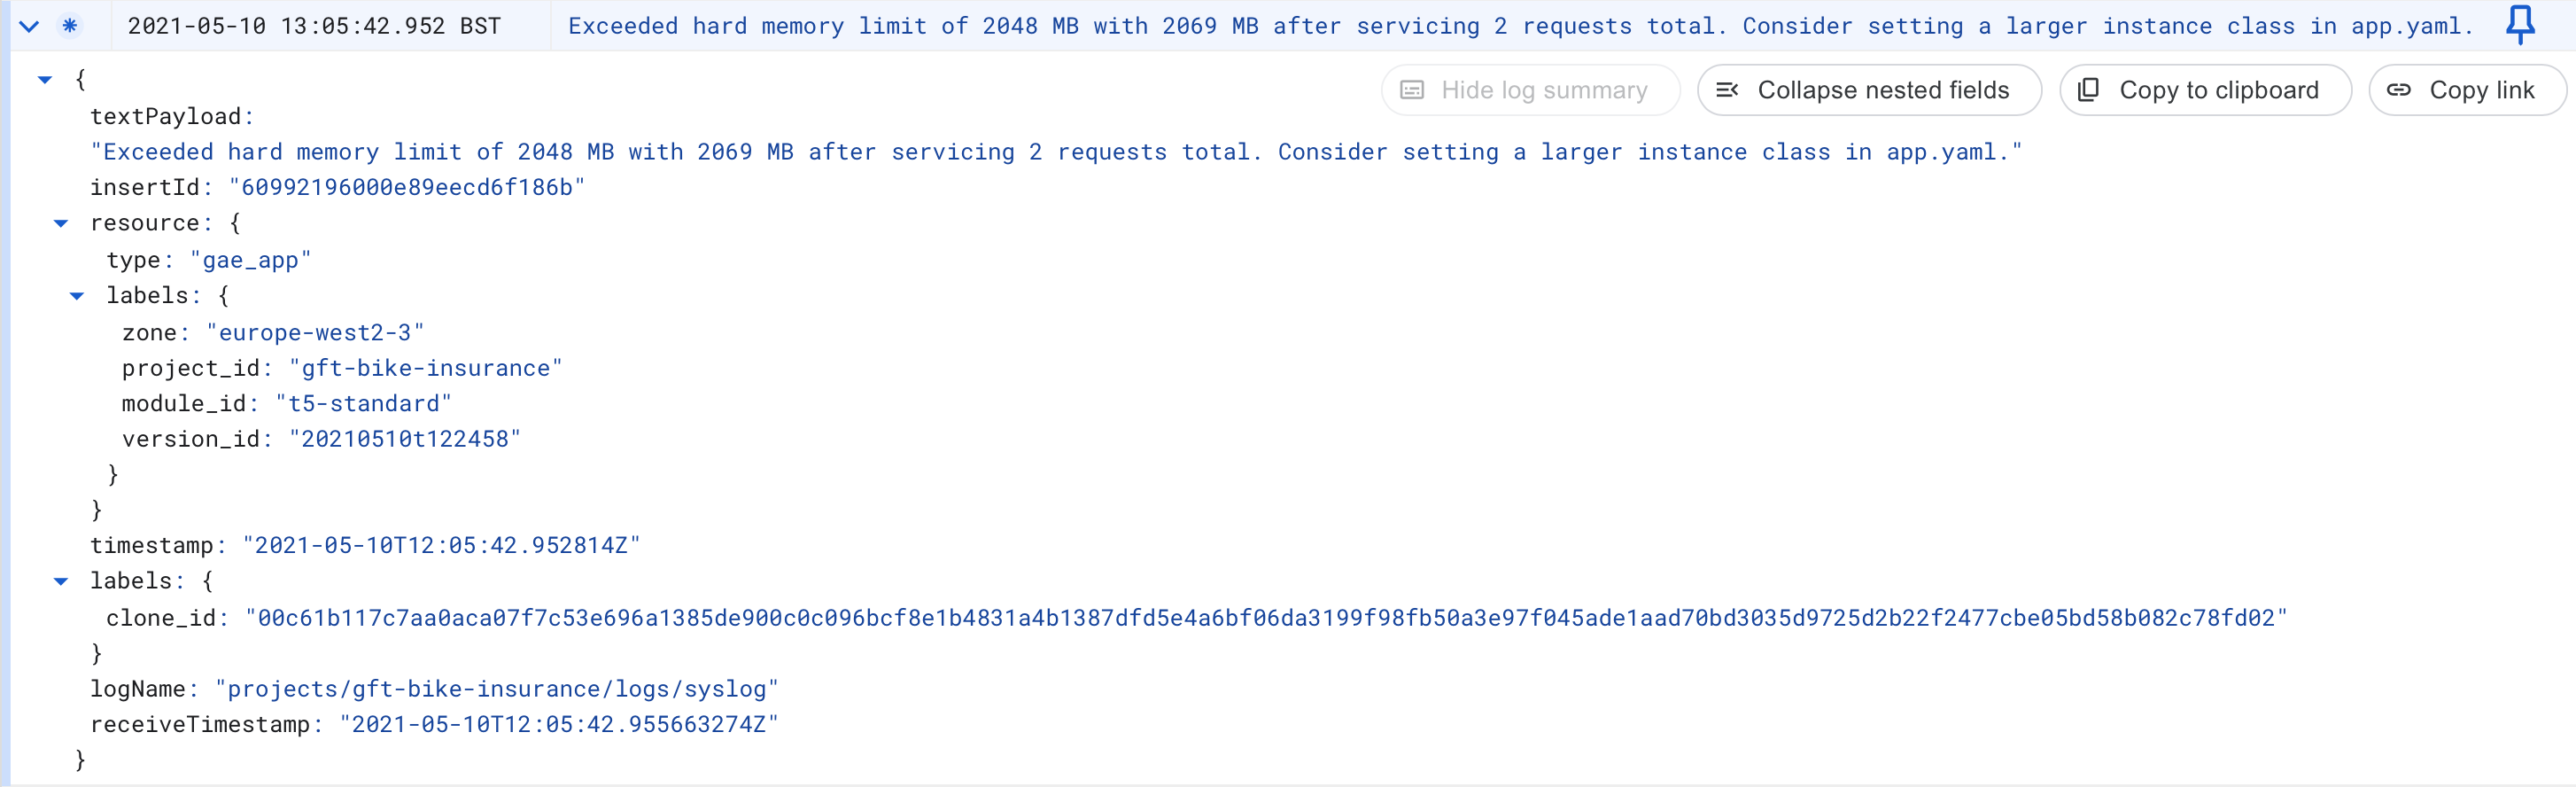

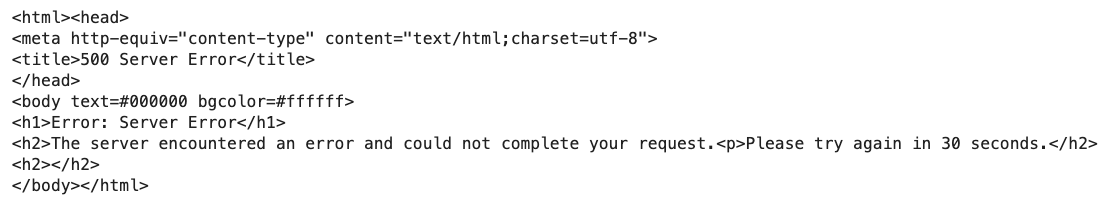

{
textPayload: "Exceeded hard memory limit of 2048 MB with 2069 MB after servicing 2 requests total. Consider setting a larger instance class in app.yaml."
insertId: "60992196000e89eecd6f186b"
resource: {
type: "gae_app"
labels: {
zone: "europe-west2-3"
project_id: "gft-bike-insurance"
module_id: "t5-standard"
version_id: "20210510t122458"
}
}
timestamp: "2021-05-10T12:05:42.952814Z"
labels: {
clone_id: "00c61b117c7aa0aca07f7c53e696a1385de900c0c096bcf8e1b4831a4b1387dfd5e4a6bf06da3199f98fb50a3e97f045ade1aad70bd3035d9725d2b22f2477cbe05bd58b082c78fd02"
}
logName: "projects/gft-bike-insurance/logs/syslog"
receiveTimestamp: "2021-05-10T12:05:42.955663274Z"
}

Thus, we need to deploy the two models in two seperate deployment

In [45]:
gee_t5_standard_base = 'https://t5-base-standard-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
gee_t5_standard_small = 'https://t5-small-standard-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'

In [46]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}

response = requests.post(gee_t5_standard_base, 
                         headers=headers, 
                         json=data_t5_base)


print(response.text)


<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>



Again, the instance is not big enough to serve the t5-base model

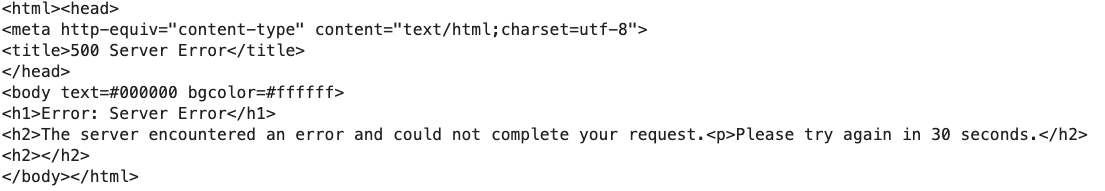

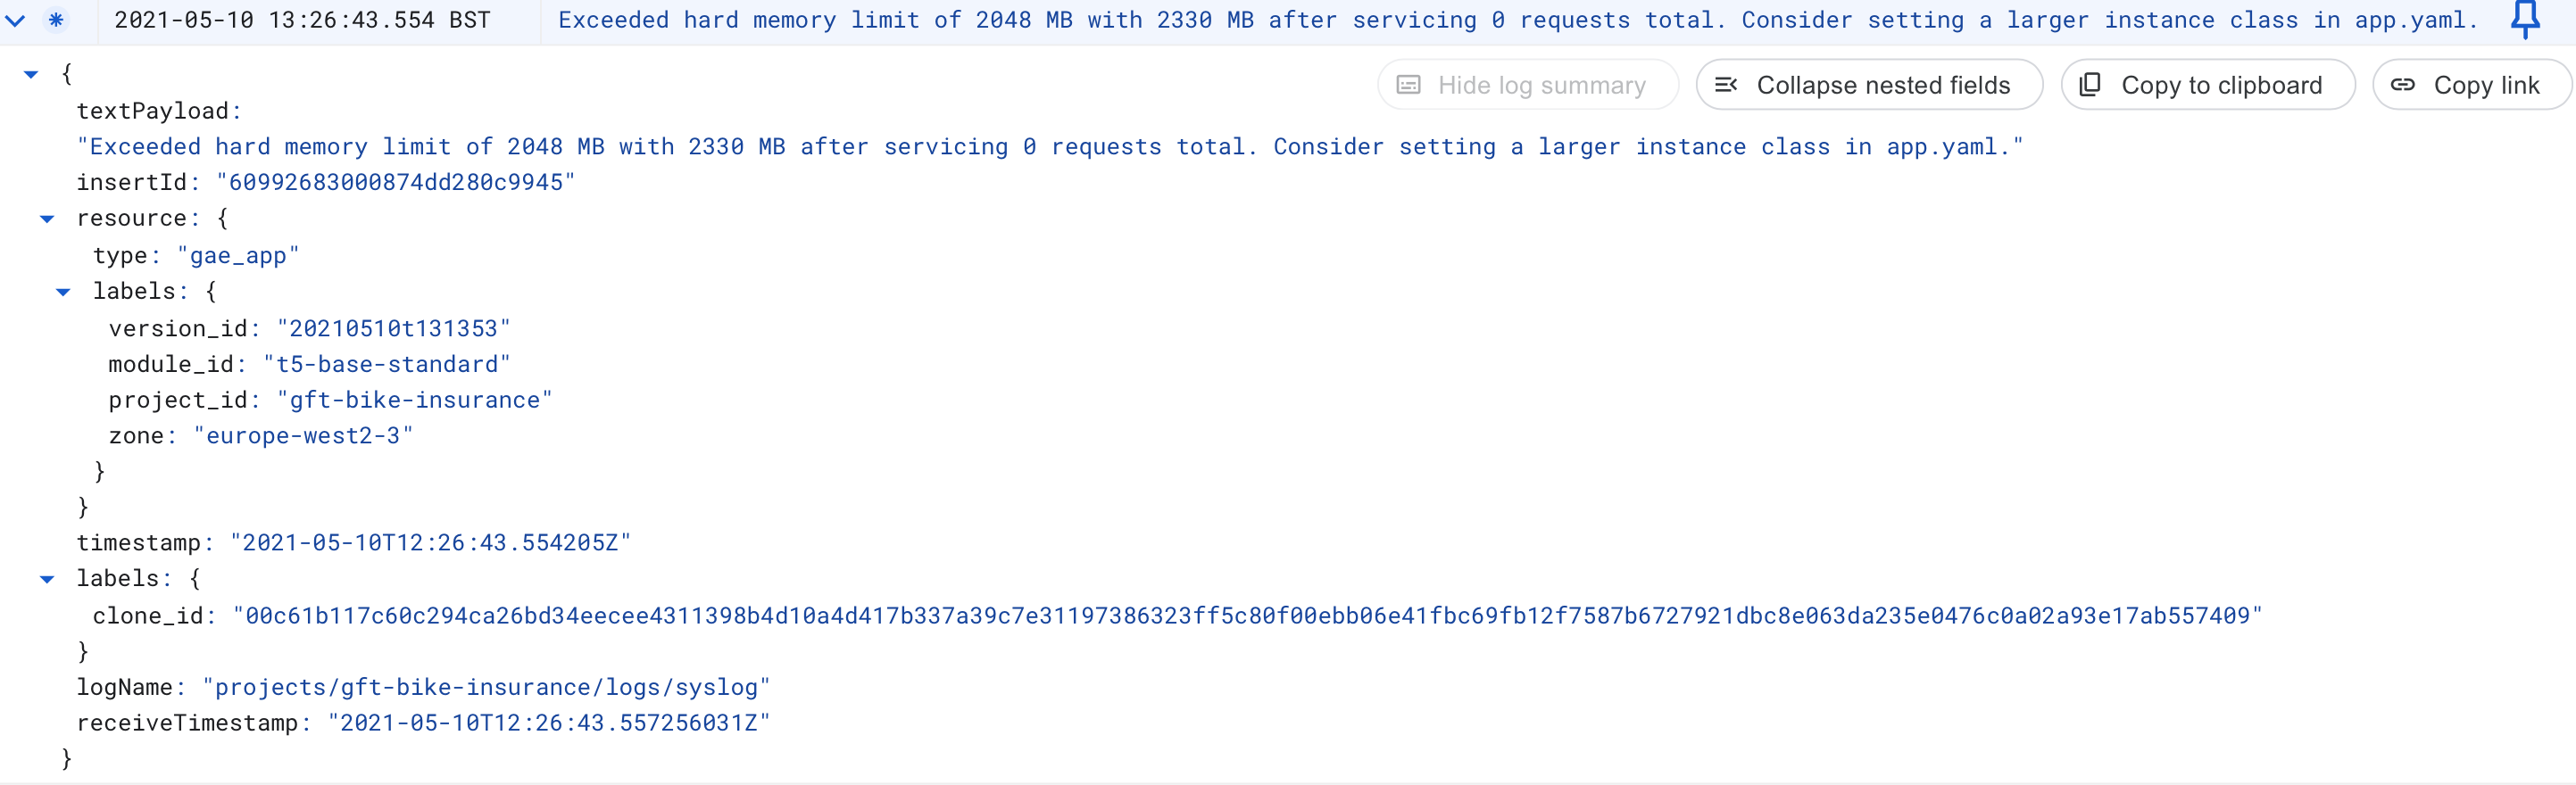

{
  "textPayload": "Exceeded hard memory limit of 2048 MB with 2330 MB after servicing 0 requests total. Consider setting a larger instance class in app.yaml.",
  "insertId": "60992683000874dd280c9945",
  "resource": {
    "type": "gae_app",
    "labels": {
      "version_id": "20210510t131353",
      "module_id": "t5-base-standard",
      "project_id": "gft-bike-insurance",
      "zone": "europe-west2-3"
    }
  },
  "timestamp": "2021-05-10T12:26:43.554205Z",
  "labels": {
    "clone_id": "00c61b117c60c294ca26bd34eecee4311398b4d10a4d417b337a39c7e31197386323ff5c80f00ebb06e41fbc69fb12f7587b6727921dbc8e063da235e0476c0a02a93e17ab557409"
  },
  "logName": "projects/gft-bike-insurance/logs/syslog",
  "receiveTimestamp": "2021-05-10T12:26:43.557256031Z"
}


In [52]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}

response = requests.post(gee_t5_standard_small, 
                         headers=headers, 
                         json=data_t5_small)


print(response.text)


<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>



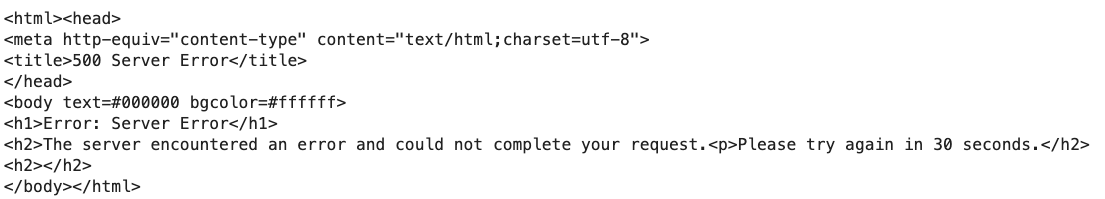
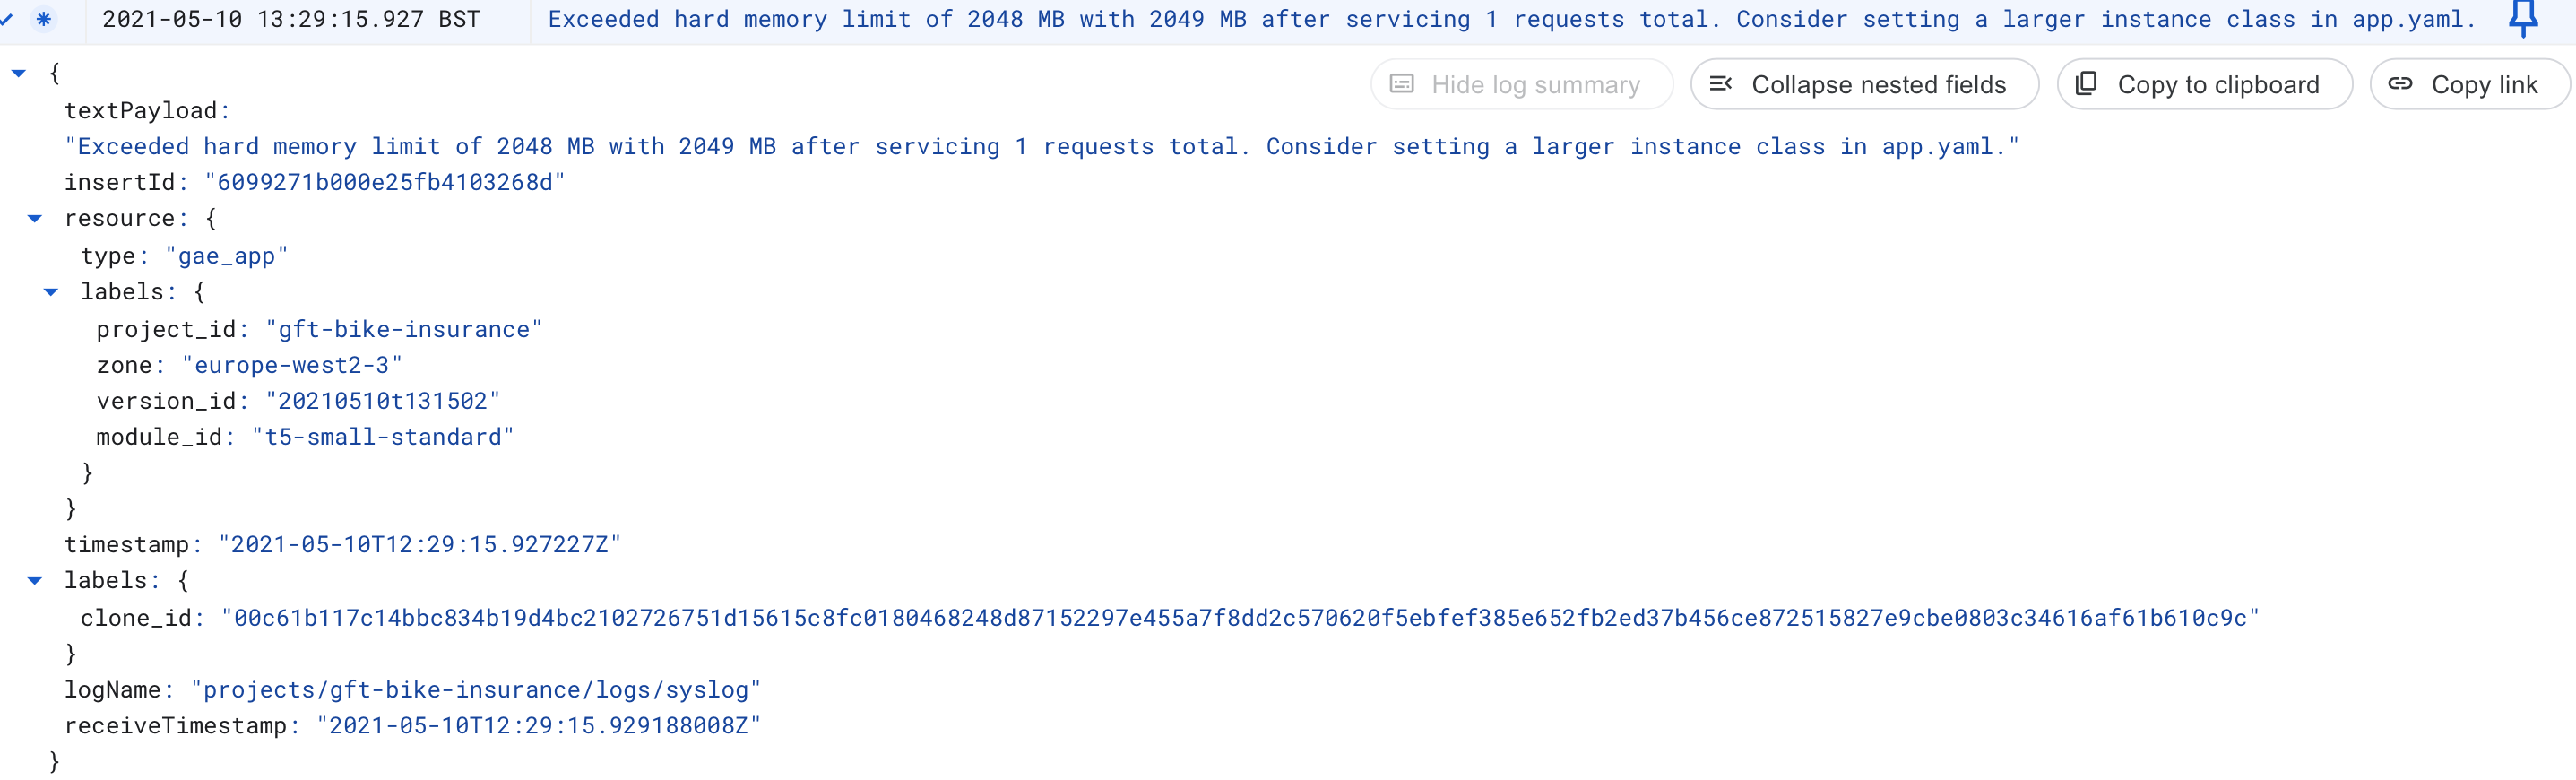

```json
{
  "textPayload": "Exceeded hard memory limit of 2048 MB with 2049 MB after servicing 1 requests total. Consider setting a larger instance class in app.yaml.",
  "insertId": "6099271b000e25fb4103268d",
  "resource": {
    "type": "gae_app",
    "labels": {
      "version_id": "20210510t131502",
      "zone": "europe-west2-3",
      "module_id": "t5-small-standard",
      "project_id": "gft-bike-insurance"
    }
  },
  "timestamp": "2021-05-10T12:29:15.927227Z",
  "labels": {
    "clone_id": "00c61b117c14bbc834b19d4bc2102726751d15615c8fc0180468248d87152297e455a7f8dd2c570620f5ebfef385e652fb2ed37b456ce872515827e9cbe0803c34616af61b610c9c"
  },
  "logName": "projects/gft-bike-insurance/logs/syslog",
  "receiveTimestamp": "2021-05-10T12:29:15.929188008Z"
}
```

## bert

In [58]:
gae_bert='https://zeroshot-bert-dot-gft-bike-insurance.nw.r.appspot.com/nlp'

In [44]:
import subprocess
import json
import requests
output = subprocess.check_output("echo $(gcloud auth print-identity-token)", shell=True, text=True)
access_token = "Bearer " + output[:-1]

headers = {'Authorization': access_token}

response = requests.post(gae_bert, 
                         headers=headers, 
                         json=data_bert)


print(response.text)

<!DOCTYPE html>
<html>
    <head>
        <!-- Required meta tags -->
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    
        <!-- Bootstrap CSS -->
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">

        <style>
            #loading{
                display: none;
                position: fixed;
                top: 50%;
                left: 50%;
                width: 45px;
                height: 45px;
                background: url(./static/img/wait.svg) no-repeat center;
                background-size: cover;
            }
        </style>
        <title>Text Labelling Service</title>
    </head>
    <body>
        
        <div class="container">
            <div class="content-section">
                <div id="loading"></d